# Data Analytics and Visualization with Python

### Learning Objective - 

- Descriptive Statistics
- Visualizing Data
    - Introduction to matplotlib library
    - Anatomy of a figure
    - Creating sub-plots
    - Chart aesthetics
- Visual Data Analytics
    - Univariate Analysis
        - count plots
        - histograms and boxplot
    - Bivariate Analysis
        - scatter plot
        - bar plot
        - line charts
        - pair plots, heatmaps
- Create and publish interactive charts using plotly and Dash

### Final Code ------------------------------------------------------------

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [3, 2]

df = pd.read_csv(r"./Datasets/coffee_sales.csv", header=3)

df.dropna(axis = 1, how="all", inplace=True)
df.fillna({"Target Profit" : "0"}, inplace=True) 

trans_obj = str.maketrans("", "", "$,")  # Note - use translate if more than 1 replace statements are needed
df.Sales = df.Sales.str.translate(trans_obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(trans_obj).astype(float)
df.Profit = df.Profit.str.replace("$", "").astype(float)
df["Target Profit"] = df["Target Profit"].str.replace("$", "").astype(float)

df["Sales Target Status"] = np.where(df.Sales >= df["Target Sales"], "Achieved", "Not-Achieved")
df["Profit Target Status"] = np.where(df.Profit >= df["Target Profit"], "Achieved", "Not-Achieved")

df["Date"] = pd.to_datetime(df["Date"], format = "mixed")
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month", df.Date.dt.month_name())

df.head()

,Date,Year,Month,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Sales Target Status,Profit Target Status
0,2021-01-01,2021,January,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not-Achieved,Not-Achieved
1,2021-02-01,2021,February,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0,Achieved,Not-Achieved
2,2021-03-01,2021,March,M1,Mumbai,Amaretto,145.0,-2.0,30.0,180.0,Not-Achieved,Not-Achieved
3,2021-04-01,2021,April,M1,Mumbai,Amaretto,45.0,11.0,20.0,40.0,Achieved,Not-Achieved
4,2021-05-01,2021,May,M1,Mumbai,Amaretto,120.0,13.0,30.0,120.0,Achieved,Not-Achieved


## Data Visualisation

### Primary Objects of matplotlib
<img src = "./images/figure.png" align = left width = 300>
<br><br><br><br><br><br><br><br>

- The [figure] is the overall figure space that can contain one or more plots
- The [axes] is the individual plots that are rendered within the figure

### Anatomy of a figure

<img src = "./images/figure_anatomy.jpg" align = left width = 400>

#### Dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
dates = np.arange('2019-01', '2022-01', dtype='datetime64[M]')
sales = np.array([42390, 77560, 77385, 76039, 42968, 53833, 47205, 68936, 51175, 48186, 71520, 66387, 62717, 52614, 42866, 64275, 44749, 68560,66258, 62221, 66303, 52428, 42300, 65645, 59215, 66944, 67519,46231, 79780, 59746, 59992, 70805, 64609, 72995, 60402, 76956])
profits = np.array([ 7206.3 ,  8531.6 , 13155.45,  9885.07,  7304.56,  9689.94, 5664.6 , 11029.76,  6141.  ,  5300.46,  9297.6 , 11285.79, 7526.04,  5787.54,  6429.9 , 12212.25,  5369.88, 12340.8 , 12589.02,  6222.1 ,  7293.33,  8388.48,  6768.  , 11816.1 , 7697.95, 11380.48,  7427.09,  6934.65,  8775.8 ,  7169.52, 7199.04,  9204.65, 10337.44,  9489.35, 10268.34, 14621.64])

### Line Chart

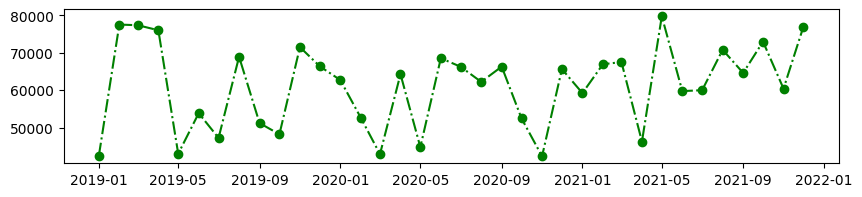

In [14]:
fig = plt.figure(figsize=(10, 2))
plt.plot(dates, sales, ls = "-.", c = "Green", marker = "o")
plt.show()

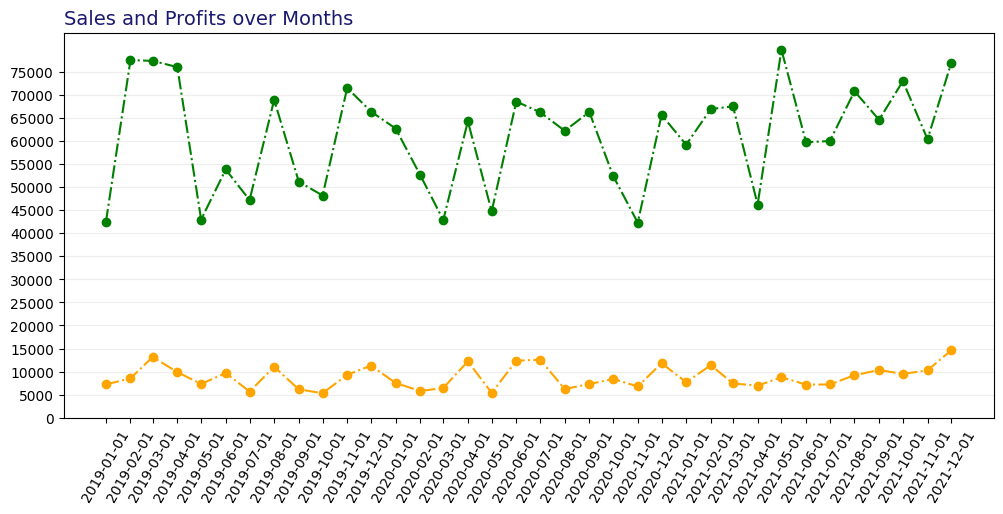

In [41]:
fig = plt.figure(figsize=(12,5))
plt.plot(dates, sales, ls = "-.", c = "Green", marker = "o")
plt.plot(dates, profits, ls = "-.", c = "Orange", marker = "o")

plt.title("Sales and Profits over Months", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 14})
plt.grid(visible=True, axis="y", c = "lightgrey", alpha = 0.4)

plt.yticks(range(0, sales.max() + 100, 5000))
plt.xticks(dates, rotation = 60)

plt.show()

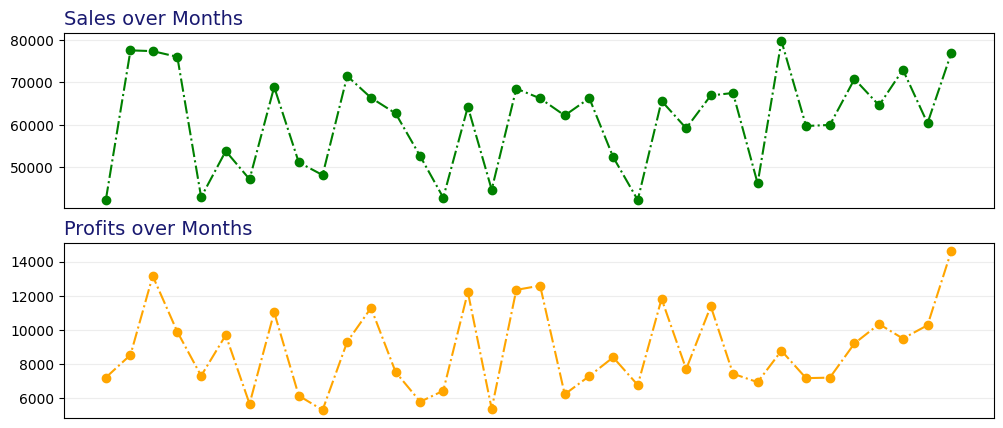

In [56]:
fig, ax = plt.subplots(figsize = (12, 5), nrows=2, sharex=True)

ax[0].plot(dates, sales, ls = "-.", c = "Green", marker = "o")
ax[1].plot(dates, profits, ls = "-.", c = "Orange", marker = "o")

ax[0].set_title("Sales over Months", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 14})
ax[1].set_title("Profits over Months", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 14})

ax[0].grid(visible=True, axis="y", c = "lightgrey", alpha = 0.4)
ax[1].grid(visible=True, axis="y", c = "lightgrey", alpha = 0.4)

# ax[1].set_yticks(np.arange(0, profits.max() + 1000, 1000))
ax[0].set_xticks([])

plt.show()

#### Dataset using coffeesales

In [60]:
data = df.groupby("Product")[["Sales", "Profit"]].sum()
products = data.index
sales = data.Sales
profits = data.Profit

### Bar Chart

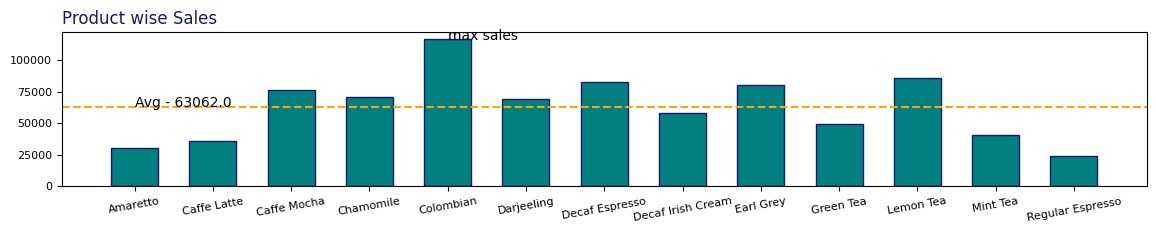

In [103]:
plt.figure(figsize = (14, 2))

plt.bar(products, sales, color = "teal", edgecolor = "midnightblue", width = 0.6)

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})

plt.axhline(sales.mean(), color = "orange", ls = "--", label = "Average Sales")

plt.annotate(f"Avg - {sales.mean().round()}", xy = (0, sales.mean()))

plt.annotate(f"max sales", xy = (sales.argmax(), sales.max()+ 10))

plt.show()

### Sorted Bar Chart

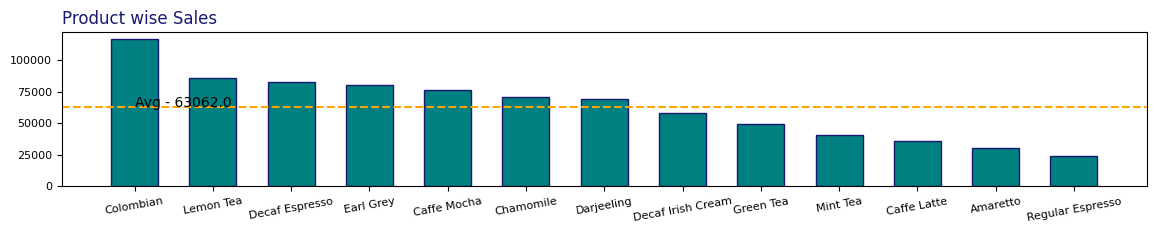

In [111]:
plt.figure(figsize = (14, 2))

sort_ord = np.argsort(sales)[::-1]

plt.bar(products[sort_ord], sales.iloc[sort_ord], color = "teal", edgecolor = "midnightblue", width = 0.6)

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})

plt.axhline(sales.mean(), color = "orange", ls = "--", label = "Average Sales")

plt.annotate(f"Avg - {sales.mean().round()}", xy = (0, sales.mean()))

plt.show()

### Stacked Bar Chart

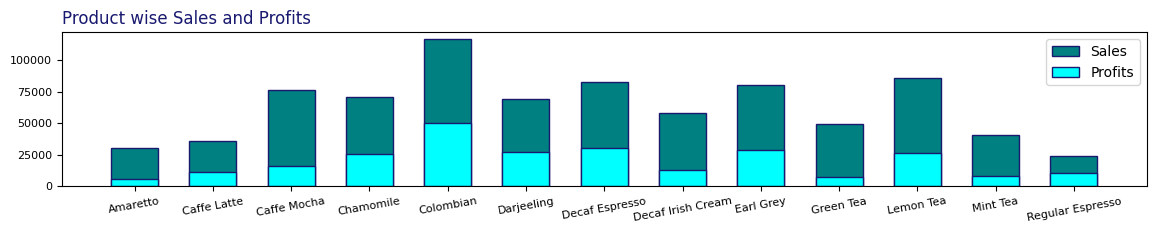

In [100]:
plt.figure(figsize = (14, 2))

plt.bar(products, sales, color = "teal", edgecolor = "midnightblue", width = 0.6)
plt.bar(products, profits, color = "cyan", edgecolor = "midnightblue", width = 0.6)

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales and Profits", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})
plt.legend(["Sales", "Profits"])

plt.show()

### Side-by-Side Bar chart

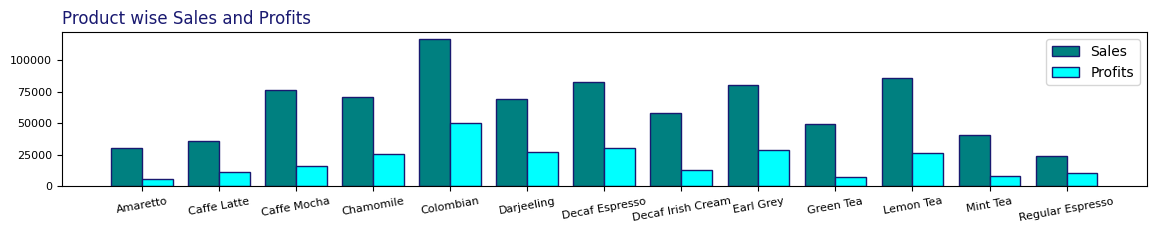

In [113]:
plt.figure(figsize = (14, 2))

plt.bar(products, sales, color = "teal", edgecolor = "midnightblue", width = -0.4, align="edge")
plt.bar(products, profits, color = "cyan", edgecolor = "midnightblue", width = 0.4, align="edge")

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales and Profits", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})
plt.legend(["Sales", "Profits"])

plt.show()

### Bullet Chart

In [174]:
data = df.groupby("Product")[["Profit", "Target Profit"]].sum()
products = data.index
profits = data.Profit
t_profit = data["Target Profit"]

In [138]:
colors = np.where(profits >= t_profit, "yellowgreen", "lightcoral")
colors

array(['lightcoral', 'yellowgreen', 'lightcoral', 'yellowgreen',
       'lightcoral', 'yellowgreen', 'lightcoral', 'lightcoral',
       'yellowgreen', 'lightcoral', 'yellowgreen', 'lightcoral',
       'yellowgreen'], dtype='<U11')

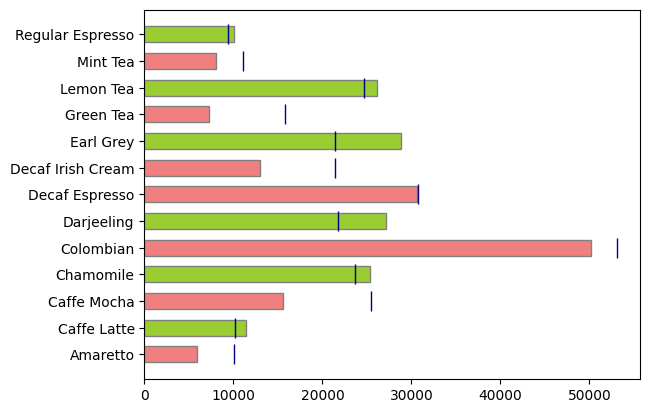

In [141]:
plt.barh(products, profits, height = 0.6, color = colors, edgecolor = "grey")
plt.plot(t_profit, products, marker = "|", markersize = 15, ls = "", c = "navy")

## Visual Data Analytics

### Univariate Analysis
Univariate analysis is a statistical method used to describe and analyze data consisting of only one variable. It focuses on understanding the characteristics and distribution of a single variable without considering the relationship with other variables.

- Descriptive Statistics
- Frequency Distribution
- Measures of Central Tendency
- Measures of Dispersion
- Visualization:
    - Box plots: Displaying the distribution of data using quartiles.
    - Histograms: Showing the frequency distribution of continuous variables.
    - Bar charts: Displaying the frequency distribution of categorical variables.
- Probability Distribution:
  - Normal distribution: Assessing if the data follows a normal distribution using graphical methods or statistical tests.

#### Categorial variable 

###### Ex. Visualise Target status on a bar chart

In [142]:
df["Sales Target Status"].value_counts()

Sales Target Status
Achieved        3215
Not-Achieved    1033
Name: count, dtype: int64

In [146]:
data = np.round(df["Sales Target Status"].value_counts(normalize=True) * 100, 2)
data

Sales Target Status
Achieved        75.68
Not-Achieved    24.32
Name: proportion, dtype: float64

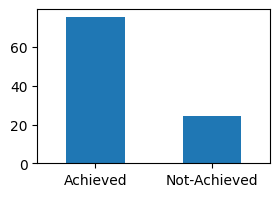

In [165]:
_ = data.plot(kind = "bar", xlabel = "")
plt.xticks(rotation = 0)
plt.show()

Text(0, 0.5, '')

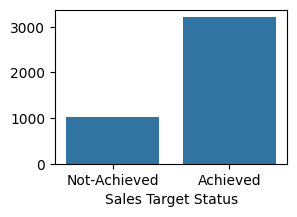

In [189]:
# directly using seaborn
_ = sns.countplot(data= df, x = "Sales Target Status")
plt.ylabel("")

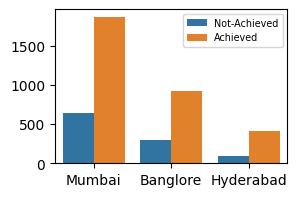

In [199]:
# directly using seaborn
ax = sns.countplot(data= df, hue = "Sales Target Status", x = "City")
# ax.legend_.remove()
ax.legend(fontsize = 'x-small')
plt.xlabel("", fontsize = 4)
_ = ax.set_ylabel("")

### Numeric Variable

Descriptive statistics deals with summarizing and describing the features of a dataset or sample. Descriptive statistics provides a summary of the main features of the data, including measures of central tendency, dispersion, shape, and relationships between variables.

**Measures of Central Tendency:**

    - Mean: The average value of the data points.
    - Median: The middle value of the data when arranged in ascending order.
    - Mode: The most frequently occurring value in the dataset.

**Measures of Dispersion:**

    - Range: The difference between the maximum and minimum values in the dataset.
    - Variance: The average of the squared differences from the mean.
    - Standard Deviation: The square root of the variance, representing the average deviation from the mean.

**Measures of Shape:**

    - Skewness: A measure of the asymmetry of the distribution.
        - Positive skewness indicates a longer right tail and a concentration of data on the left side.
        - Negative skewness indicates a longer left tail and a concentration of data on the right side.
        - Skewness close to zero indicates approximate symmetry around the mean.

    - Kurtosis: A measure of the "peakedness" or "flatness" of the distribution.
        - Positive kurtosis indicates heavy tails and a sharp peak (leptokurtic).
        - Negative kurtosis indicates light tails and a flat peak (platykurtic).
        - A kurtosis of 0 indicates a distribution with similar tails to the normal distribution (mesokurtic).

**Frequency Distribution:**

    - Frequency table: A table that shows the frequency or count of each value in the dataset.
    - Histogram: A graphical representation of the frequency distribution, showing the distribution of values in bins or intervals.

In [206]:
data = df[["Sales", "Profit"]]

#### df.describe()

In [205]:
data.describe().round(2)

,Sales,Profit
count,4248.00,4248.00
mean,192.99,61.10
std,151.13,101.71
min,17.00,-638.00
25%,100.00,17.00
50%,138.00,40.00
75%,230.00,92.00
max,912.00,778.00


#### Histogram

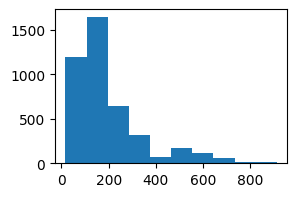

In [203]:
_ = plt.hist(df.Sales)

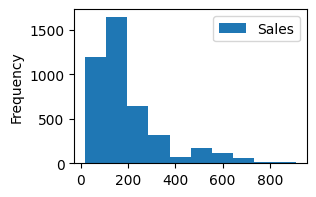

In [210]:
_ = data.plot(kind = "hist", y = "Sales")

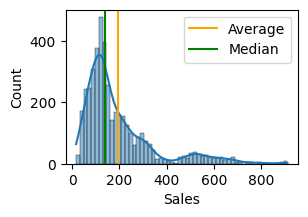

In [216]:
_ = sns.histplot(data, x = "Sales", kde = True)
plt.axvline(data.Sales.mean(), color = "orange", label = "Average")
plt.axvline(np.median(data.Sales), color = "green", label = "Median")
plt.legend()

In [223]:
from scipy import stats
stats.kurtosis(data.Sales)

np.float64(3.4883863060250606)

In [224]:
stats.skew(data.Sales)

np.float64(1.8812746332702532)

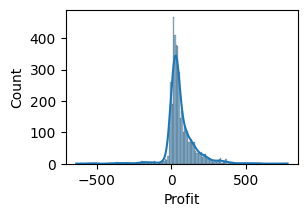

In [229]:
_ = sns.histplot(data, x = "Profit", kde = True)
# plt.axvline(data.Profit.mean(), color = "orange", label = "Average")
# plt.axvline(np.median(data.Profit), color = "green", label = "Median")
# plt.legend()

In [225]:
stats.kurtosis(data.Profit)

np.float64(9.779541380894665)

In [226]:
stats.skew(data.Profit)

np.float64(0.44520573924234763)

### Analysing Outliers

#### Box and Whisker Plot

<Axes: ylabel='Sales'>

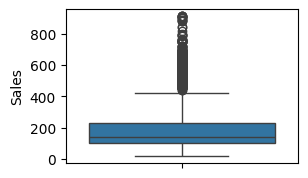

In [232]:
_ = sns.boxplot(data, y = "Sales")

In [ ]:
median = np.median(df.Sales)
Q1 = np.percentile(df.Sales, 25)
Q3 = np.percentile(df.Sales, 75)

IQR = Q3 - Q1
min_w = Q1 - 1.5 * IQR
max_w = Q3 + 1.5 * IQR

###### Ex. Find number of outliers in Sales column using IQR method

In [247]:
sum(df.Sales > max_w)

406

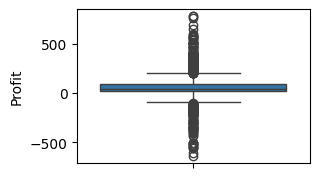

In [234]:
_ = sns.boxplot(data, y = "Profit")

In [248]:
median = np.median(df.Profit)
Q1 = np.percentile(df.Profit, 25)
Q3 = np.percentile(df.Profit, 75)

IQR = Q3 - Q1
min_w = Q1 - 1.5 * IQR
max_w = Q3 + 1.5 * IQR

In [251]:
sum(~df.Profit.between(min_w, max_w))

405

#### Z-Scores

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### Bivariate Analysis

Bivariate analysis is a statistical method used to analyze the relationship between two variables simultaneously. 

#### Numerical-Numerical Analysis:

- Scatter Plots: Scatter plots with a regression line can show the relationship between two continuous variables. Each data point represents a combination of values from both variables.

- Correlation Analysis: Quantifies the strength and direction of the linear relationship between two continuous variables. Pearson correlation coefficient (r) measures the degree of linear association between variables. 
	- It ranges from -1 to 1, where:
	- r = 1: Perfect positive correlation
	- r = -1: Perfect negative correlation
	- r = 0: No correlation

#### Categorical-Categorical Analysis:

- Contingency tables (also known as cross-tabulations) display the frequency distribution of categories for two categorical variables. 

#### Categorical-Numerical Analysis:

- Box plots or bar charts with groupings display the distribution of a numerical variable across different categories of a categorical variable.

#### Categorial vs Numeric

###### Ex. Visualise product-wise Sales
###### Ex. Display product-wise total sales across state Manipur in DESC Order. Find the product generating maximum sales.

#### Numerical vs Numerical

#### Categorial vs categorial

### Example on Multivariate Analysis

###### Ex. Number of franchises the product being sold in each city